In [1]:
import pandas as pd
data=pd.read_csv('C:/Users/SRIKANT/Downloads/archive/JEOPARDY_CSV.csv')

In [2]:
data[' Value'].unique()

array(['$200', '$400', '$600', '$800', '$2,000', '$1000', '$1200',
       '$1600', '$2000', '$3,200', 'None', '$5,000', '$100', '$300',
       '$500', '$1,000', '$1,500', '$1,200', '$4,800', '$1,800', '$1,100',
       '$2,200', '$3,400', '$3,000', '$4,000', '$1,600', '$6,800',
       '$1,900', '$3,100', '$700', '$1,400', '$2,800', '$8,000', '$6,000',
       '$2,400', '$12,000', '$3,800', '$2,500', '$6,200', '$10,000',
       '$7,000', '$1,492', '$7,400', '$1,300', '$7,200', '$2,600',
       '$3,300', '$5,400', '$4,500', '$2,100', '$900', '$3,600', '$2,127',
       '$367', '$4,400', '$3,500', '$2,900', '$3,900', '$4,100', '$4,600',
       '$10,800', '$2,300', '$5,600', '$1,111', '$8,200', '$5,800',
       '$750', '$7,500', '$1,700', '$9,000', '$6,100', '$1,020', '$4,700',
       '$2,021', '$5,200', '$3,389', '$4,200', '$5', '$2,001', '$1,263',
       '$4,637', '$3,201', '$6,600', '$3,700', '$2,990', '$5,500',
       '$14,000', '$2,700', '$6,400', '$350', '$8,600', '$6,300', '$250',
    

In [3]:
#assigin unique values to the show number and air date using label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Show Number']=encoder.fit_transform(data['Show Number'])
data[' Air Date']=encoder.fit_transform(data[' Air Date'])

In [4]:
#cleaning all texts by removering special chars except ""(double quotes) , because double qoutes might provide import info
import re
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field]#.str.lower()
    df[new_text_field_name]=df[new_text_field_name].str.replace('[!@#$%^&*(),.?:{}|<>\']','',regex=True)
    
    return df

data1=clean_text(data, ' Question', 'Question_clean')
data1=clean_text(data1, ' Category', 'Category_clean')
data1[' Answer']=data1[' Answer'].astype(str)
data1=clean_text(data1, ' Answer', 'Answer_clean')
data1

,Show Number,Air Date,Round,Category,Value,Question,Answer,Question_clean,Category_clean,Answer_clean
0,2021,2021,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,For the last 8 years of his life Galileo was u...,HISTORY,Copernicus
1,2021,2021,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,No 2 1912 Olympian; football star at Carlisle ...,ESPNs TOP 10 ALL-TIME ATHLETES,Jim Thorpe
2,2021,2021,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,The city of Yuma in this state has a record av...,EVERYBODY TALKS ABOUT IT,Arizona
3,2021,2021,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,"In 1963 live on ""The Art Linkletter Show"" this...",THE COMPANY LINE,McDonalds
4,2021,2021,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,Signer of the Dec of Indep framer of the Const...,EPITAPHS TRIBUTES,John Adams
...,...,...,...,...,...,...,...,...,...,...
216925,2340,2340,Double Jeopardy!,RIDDLE ME THIS,$2000,This Puccini opera turns on the solution to 3 ...,Turandot,This Puccini opera turns on the solution to 3 ...,RIDDLE ME THIS,Turandot
216926,2340,2340,Double Jeopardy!,"""T"" BIRDS",$2000,In North America this term is properly applied...,a titmouse,In North America this term is properly applied...,"""T"" BIRDS",a titmouse
216927,2340,2340,Double Jeopardy!,AUTHORS IN THEIR YOUTH,$2000,"In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker,"In Penny Lane where this ""Hellraiser"" grew up ...",AUTHORS IN THEIR YOUTH,Clive Barker
216928,2340,2340,Double Jeopardy!,QUOTATIONS,$2000,"From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo,From Ft Sill Okla he made the plea Arizona is ...,QUOTATIONS,Geronimo


In [5]:
data1[' Value']=data1[' Value'].str.replace('$','').str.replace(',','')#.str.replace('None','0')


In [6]:
#as we know for tiebreaker and final breaker value will be None hence remove values with None 
data1=data1[data1[' Value']!='None']
data1[' Value'].astype(int)

0          200
1          200
2          200
3          200
4          200
          ... 
216924    2000
216925    2000
216926    2000
216927    2000
216928    2000
Name:  Value, Length: 213296, dtype: int32

In [65]:
#copying the df , just to backtrack incase of any error
data2=data1#.drop([' Air Date'],axis=1)

In [66]:
data2[' Round']=data2[' Round'].str.replace('!','').str.lower()

C:\Users\SRIKANT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  

In [69]:
#expand the words from question and category 
contractions_dict = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [70]:
import regex as re
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict):
     def replace(match):
        return contractions_dict[match.group(0)]
     return contractions_re.sub(replace, s)


data2['Question_clean']=data2['Question_clean'].apply(lambda x: expand_contractions(x) )
data2['Category_clean']=data2['Category_clean'].apply(lambda x: expand_contractions(x) )
data2['Category_clean']

C:\Users\SRIKANT\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\SRIKANT\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0                                HISTORY
1         ESPNs TOP 10 ALL-TIME ATHLETES
2               EVERYBODY TALKS ABOUT IT
3                       THE COMPANY LINE
4                     EPITAPHS  TRIBUTES
                       ...              
216924                      OFF-BROADWAY
216925                    RIDDLE ME THIS
216926                         "T" BIRDS
216927            AUTHORS IN THEIR YOUTH
216928                        QUOTATIONS
Name: Category_clean, Length: 213296, dtype: object

In [72]:
from nltk.stem import WordNetLemmatizer
#token and lemmatize the words, im not removing stop words because we will lose important data specially from questions
lemmatizer = WordNetLemmatizer()
data2['Question_tokens'] = data2['Question_clean'].apply(lambda x: word_tokenize(x))
data2['Question_tokens'] = data2['Question_tokens'].apply(lambda x:[lemmatizer.lemmatize(i) for i in x])
data2['Category_tokens'] = data2['Category_clean'].apply(lambda x: word_tokenize(x))
data2['Category_tokens'] = data2['Category_tokens'].apply(lambda x:[lemmatizer.lemmatize(i) for i in x])

C:\Users\SRIKANT\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\SRIKANT\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\SRIKANT\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [73]:
data2['Answer_tokens'] = data2['Answer_clean'].apply(lambda x: word_tokenize(x))
data2['Answer_tokens'] = data2['Answer_tokens'].apply(lambda x:[lemmatizer.lemmatize(i) for i in x])

C:\Users\SRIKANT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SRIKANT\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
#if que is an image
data2=data2[data2['Question_clean']!='']
data2=data2[data2['Category_clean']!='  ']

In [75]:
data2

,Show Number,Air Date,Round,Category,Value,Question,Answer,Question_clean,Category_clean,Answer_clean,Question_tokens,Category_tokens,Answer_tokens
0,2021,2021,jeopardy,HISTORY,200,"For the last 8 years of his life, Galileo was ...",Copernicus,For the last 8 years of his life Galileo was u...,HISTORY,Copernicus,"[For, the, last, 8, year, of, his, life, Galil...",[HISTORY],[Copernicus]
1,2021,2021,jeopardy,ESPN's TOP 10 ALL-TIME ATHLETES,200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,No 2 1912 Olympian; football star at Carlisle ...,ESPNs TOP 10 ALL-TIME ATHLETES,Jim Thorpe,"[No, 2, 1912, Olympian, ;, football, star, at,...","[ESPNs, TOP, 10, ALL-TIME, ATHLETES]","[Jim, Thorpe]"
2,2021,2021,jeopardy,EVERYBODY TALKS ABOUT IT...,200,The city of Yuma in this state has a record av...,Arizona,The city of Yuma in this state has a record av...,EVERYBODY TALKS ABOUT IT,Arizona,"[The, city, of, Yuma, in, this, state, ha, a, ...","[EVERYBODY, TALKS, ABOUT, IT]",[Arizona]
3,2021,2021,jeopardy,THE COMPANY LINE,200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,"In 1963 live on ""The Art Linkletter Show"" this...",THE COMPANY LINE,McDonalds,"[In, 1963, live, on, ``, The, Art, Linkletter,...","[THE, COMPANY, LINE]",[McDonalds]
4,2021,2021,jeopardy,EPITAPHS & TRIBUTES,200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,Signer of the Dec of Indep framer of the Const...,EPITAPHS TRIBUTES,John Adams,"[Signer, of, the, Dec, of, Indep, framer, of, ...","[EPITAPHS, TRIBUTES]","[John, Adams]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216924,2340,2340,double jeopardy,OFF-BROADWAY,2000,In 2006 the cast of this long-running hit emba...,Stomp,In 2006 the cast of this long-running hit emba...,OFF-BROADWAY,Stomp,"[In, 2006, the, cast, of, this, long-running, ...",[OFF-BROADWAY],[Stomp]
216925,2340,2340,double jeopardy,RIDDLE ME THIS,2000,This Puccini opera turns on the solution to 3 ...,Turandot,This Puccini opera turns on the solution to 3 ...,RIDDLE ME THIS,Turandot,"[This, Puccini, opera, turn, on, the, solution...","[RIDDLE, ME, THIS]",[Turandot]
216926,2340,2340,double jeopardy,"""T"" BIRDS",2000,In North America this term is properly applied...,a titmouse,In North America this term is properly applied...,"""T"" BIRDS",a titmouse,"[In, North, America, this, term, is, properly,...","[``, T, '', BIRDS]","[a, titmouse]"
216927,2340,2340,double jeopardy,AUTHORS IN THEIR YOUTH,2000,"In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker,"In Penny Lane where this ""Hellraiser"" grew up ...",AUTHORS IN THEIR YOUTH,Clive Barker,"[In, Penny, Lane, where, this, ``, Hellraiser,...","[AUTHORS, IN, THEIR, YOUTH]","[Clive, Barker]"


In [76]:
from gensim.models import Word2Vec


In [77]:
data2[' Round']=data2[' Round'].str.split()


In [78]:
#vectorize the tokens by the use of word2vec from gensim
w2v=Word2Vec()
model = Word2Vec(min_count=1)
model.build_vocab(data2['Question_tokens'])
model.build_vocab(data2['Category_tokens'],update=True)
model.build_vocab(data2['Answer_tokens'],update=True)
model.build_vocab(data2[' Round'],update=True)
model.train(data2['Question_tokens'], total_examples=model.corpus_count, epochs=model.epochs)
model.train(data2['Category_tokens'], total_examples=model.corpus_count, epochs=model.epochs)
model.train(data2['Answer_tokens'], total_examples=model.corpus_count, epochs=model.epochs)
model.train(data2[' Round'], total_examples=model.corpus_count, epochs=model.epochs)

(74313, 1596040)

In [79]:
data2=data2[data2['Answer_clean']!='']
data2=data2[data2['Category_clean']!='']
# data2['Category_clean'][i]

In [80]:
#As a classic ML approach (non Neural Network) accepts input of fixed size , take mean of vectors generated from word2vec
import numpy as np
data2['Question_vecs']=data2['Question_tokens'].apply(lambda x: np.mean(model.wv[x]))
data2['Answer_vecs']=data2['Answer_tokens'].apply(lambda x: np.mean(model.wv[x]))
data2['Category_vecs']=data2['Category_tokens'].apply(lambda x: np.mean(model.wv[x]))
data2[' Round']=data2[' Round'].apply(lambda x: np.mean(model.wv[x]))



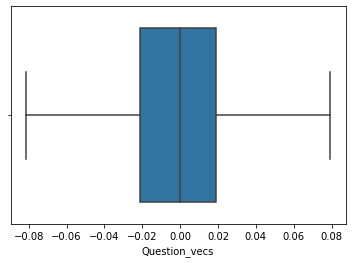

In [81]:
# remove the outliers by using boxplots
import seaborn as sns
sns.boxplot(x=data2['Question_vecs'],showfliers=False)

In [82]:
data2['Question_vecs']=data2['Question_vecs'][data2['Question_vecs']>-0.08][data2['Question_vecs']<0.08]

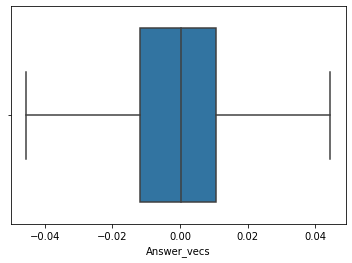

In [83]:
sns.boxplot(x=data2['Answer_vecs'],showfliers=False)

In [52]:
data2['Answer_vecs']=data2['Answer_vecs'][data2['Answer_vecs']>-0.04][data2['Answer_vecs']<0.06]

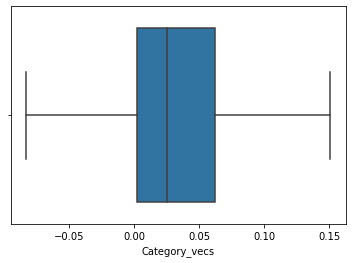

In [84]:
sns.boxplot(x=data2['Category_vecs'],showfliers=False)

In [85]:
data2['Category_vecs']=data2['Category_vecs'][data2['Category_vecs']>-0.06][data2['Category_vecs']<0.15]

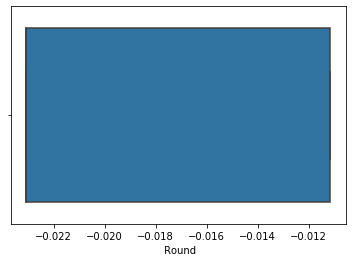

In [87]:
sns.boxplot(x=data2[' Round'])

In [56]:
data2[' Round']=data2[' Round'][data2[' Round']>0.028][data2[' Round']<0.038]

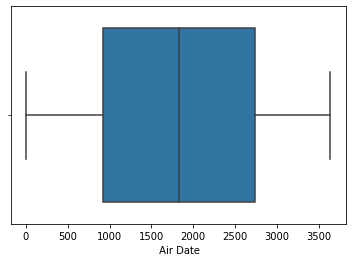

In [88]:
sns.boxplot(x=data2[' Air Date'])

In [89]:
data3=data2[[' Round','Question_vecs', 'Answer_vecs',
       'Category_vecs','Show Number',' Value',' Air Date']]

In [90]:
data3[' Value']=data3[' Value'].astype(int)

C:\Users\SRIKANT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
data3.corr()

,Round,Question_vecs,Answer_vecs,Category_vecs,Show Number,Value,Air Date
Round,1.000000,-0.022732,-0.029239,-0.023003,0.000070,0.412122,0.000070
Question_vecs,-0.022732,1.000000,0.114165,0.068444,0.089967,0.015288,0.089967
Answer_vecs,-0.029239,0.114165,1.000000,0.022853,-0.003361,-0.019428,-0.003361
Category_vecs,-0.023003,0.068444,0.022853,1.000000,0.101807,0.021844,0.101807
Show Number,0.000070,0.089967,-0.003361,0.101807,1.000000,0.312351,1.000000
Value,0.412122,0.015288,-0.019428,0.021844,0.312351,1.000000,0.312351
Air Date,0.000070,0.089967,-0.003361,0.101807,1.000000,0.312351,1.000000


In [92]:
#club the classes which are less in numbers
def club_classes(value):
    if value < 1000:
        return np.round(value, -2)
    elif value < 10000:
        return np.round(value, -3)
    else:
        return np.round(value, -4)

data3['ValueBins']=data3[' Value'].apply(club_classes)

C:\Users\SRIKANT\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [93]:
#removed class of 20000 ,as the count was very less
data3=data3[data3['ValueBins']!=20000]

In [94]:
data3['ValueBins']=data3['ValueBins'].astype(int)
data3.corr()

,Round,Question_vecs,Answer_vecs,Category_vecs,Show Number,Value,Air Date,ValueBins
Round,1.000000,-0.022723,-0.029240,-0.022997,0.000054,0.413174,0.000054,0.411859
Question_vecs,-0.022723,1.000000,0.114167,0.068439,0.089983,0.015571,0.089983,0.016222
Answer_vecs,-0.029240,0.114167,1.000000,0.022854,-0.003363,-0.019508,-0.003363,-0.019866
Category_vecs,-0.022997,0.068439,0.022854,1.000000,0.101820,0.022088,0.101820,0.022427
Show Number,0.000054,0.089983,-0.003363,0.101820,1.000000,0.312932,1.000000,0.310491
Value,0.413174,0.015571,-0.019508,0.022088,0.312932,1.000000,0.312932,0.985775
Air Date,0.000054,0.089983,-0.003363,0.101820,1.000000,0.312932,1.000000,0.310491
ValueBins,0.411859,0.016222,-0.019866,0.022427,0.310491,0.985775,0.310491,1.000000


In [95]:
data3.isna().sum()

 Round              0
Question_vecs    4216
Answer_vecs         0
Category_vecs    1517
Show Number         0
 Value              0
 Air Date           0
ValueBins           0
dtype: int64

In [96]:
X=data3.drop(['Answer_vecs','Show Number','ValueBins',' Value'],axis=1)
y=data3['ValueBins']
X.isna().sum()

 Round              0
Question_vecs    4216
Category_vecs    1517
 Air Date           0
dtype: int64

In [97]:
X=X.dropna()
y=y[X.index]

In [98]:
X

,Round,Question_vecs,Category_vecs,Air Date
0,-0.023083,-0.034225,0.005912,2021
1,-0.023083,0.004952,0.008957,2021
2,-0.023083,0.015552,0.033177,2021
3,-0.023083,-0.016667,0.088503,2021
4,-0.023083,0.023409,0.002693,2021
...,...,...,...,...
216924,-0.011152,0.002344,0.001773,2340
216925,-0.011152,0.010102,0.029118,2340
216926,-0.011152,-0.007220,0.061589,2340
216927,-0.011152,-0.009807,0.056830,2340


In [99]:
#scaling features to the unit varience
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
value_date=scaler.transform(X)


In [127]:
y.value_counts()

400      41060
1000     33009
800      31014
200      29560
2000     24596
600      19867
100       8757
500       8745
300       8418
3000      1054
4000       570
5000       310
700        200
6000       135
900        109
7000        59
10000       45
8000        43
9000        15
0           12
Name: ValueBins, dtype: int64

In [100]:
#As classes is highly imbalanced, generate the synthetic data 
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_s1, y_s1 = oversample.fit_resample(value_date, y)

In [101]:
y_s1.value_counts()

500      41060
1000     41060
600      41060
100      41060
700      41060
200      41060
10000    41060
800      41060
300      41060
9000     41060
8000     41060
7000     41060
6000     41060
900      41060
5000     41060
400      41060
4000     41060
3000     41060
2000     41060
0        41060
Name: ValueBins, dtype: int64

In [102]:
# X=X.dropna()

value_date

array([[-0.99454225, -1.13323812, -0.74714638,  0.18394012],
       [-0.99454225,  0.21185392, -0.66936101,  0.18394012],
       [-0.99454225,  0.57579914, -0.05073137,  0.18394012],
       ...,
       [ 1.0054877 , -0.20606518,  0.6749925 ,  0.48828467],
       [ 1.0054877 , -0.29487299,  0.55343814,  0.48828467],
       [ 1.0054877 , -0.47845508, -0.64701623,  0.48828467]])

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_s1,y_s1,test_size=0.2,random_state=4)

In [120]:
#build model using random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=80,n_estimators=100,min_samples_split=12,min_samples_leaf=5)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=5, min_samples_split=12)

In [114]:
res=rf.predict(X_test)

In [121]:
res #rf=RandomForestClassifier(max_depth=80,n_estimators=100,min_samples_split=7,min_samples_leaf=5)


array([ 400, 7000, 7000, ...,  100,  100, 4000])

In [122]:
y_test

420089     800
673131    7000
696293    7000
471479    1000
454864     900
          ... 
207161    2000
136458     200
273717     100
137765     400
556922    4000
Name: ValueBins, Length: 164240, dtype: int32

In [123]:
rf.score(X_train,y_train)

0.8513821237213833

In [124]:
rf.score(X_test,y_test)

0.7120007306380906

In [126]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, res))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8135
         100       0.65      0.73      0.69      8128
         200       0.34      0.22      0.27      8240
         300       0.65      0.73      0.69      8190
         400       0.12      0.02      0.03      8264
         500       0.65      0.71      0.68      8162
         600       0.40      0.65      0.49      8199
         700       0.80      0.94      0.87      8174
         800       0.33      0.16      0.21      8324
         900       0.83      0.97      0.89      8292
        1000       0.31      0.14      0.20      8294
        2000       0.50      0.54      0.52      8258
        3000       0.73      0.81      0.77      8203
        4000       0.75      0.87      0.81      8097
        5000       0.80      0.92      0.86      8039
        6000       0.86      0.97      0.91      8192
        7000       0.90      0.99      0.94      8247
        8000       0.91    